# Module 7 Activity

## Part 1 - Depth-First and Breadth-First Search

Breadth-First Search (BFS) and Depth-First Search (DFS) are two fundamental algorithms used to traverse or search through data structures like trees and graphs. These methods help in exploring the nodes or vertices of these structures in a systematic way to find particular elements, paths, or to analyze their properties.

**Breadth-First Search (BFS)** works on the principle of exploring all the neighbors of a node before moving on to the neighbors of those neighbors. It starts from a selected node (often called the 'root' in a tree, or any arbitrary node in a graph) and explores the neighbor nodes first, before moving to the next level neighbors. This method uses a queue to keep track of the nodes that need to be explored next. BFS is particularly useful for finding the shortest path on unweighted graphs, as it guarantees the minimum number of edges that must be traversed to reach a node from the starting point.

**Depth-First Search (DFS)**, on the other hand, dives deep into the data structure as far as possible before backtracking. Starting from a selected node, it explores as far as possible along each branch before backtracking. This method uses a stack (either explicitly or through recursion) to keep track of the nodes that are being explored. DFS is useful for exploring all the nodes in a graph and can be used to solve puzzles, navigate mazes, and find paths. It is also used in algorithms that require visiting every node, such as checking for cycle in a graph or topological sorting.

In the activity, you will be tasked with placing labels in order based on each algorithm's approach to traversal. This hands-on exercise will help you visualize how BFS and DFS differ in their exploration strategy and the order in which nodes are visited. You'll gain a deeper understanding of their applications and how they can be used to solve various computational problems.

Use the figure below to traverse the tree structure in both BFS and DFS and write out how the labels would come out for each. You may implement in code or do it by hand and write your answer below the image. 

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

In [43]:
# Create an empty graph
G = nx.Graph()

# Add nodes with the node attribute 'pos' to position them
positions = {13: (0, 0), 14: (4, 0), 15: (8, 0), 16: (10, 0), 17: (12, 0), 18: (14, 0),
             5: (0, 2), 6: (2, 2), 7: (4, 2), 8: (6, 2), 9: (8, 2), 10: (10, 2), 11: (12, 2), 12: (14, 2),
             2: (5, 5), 3: (8, 5), 4: (11, 5), 1: (8, 7)}

edges = {(13, 5), (5, 2), (2, 1), (1, 3), (1, 4), (2, 6), 
         (2, 7), (7, 14), (3, 8), (3, 9), (9, 15), (4, 10), 
         (4, 11), (4, 12), (10, 16), (11, 17), (12, 18)}

G.add_nodes_from(positions.keys())
G.add_edges_from(edges)

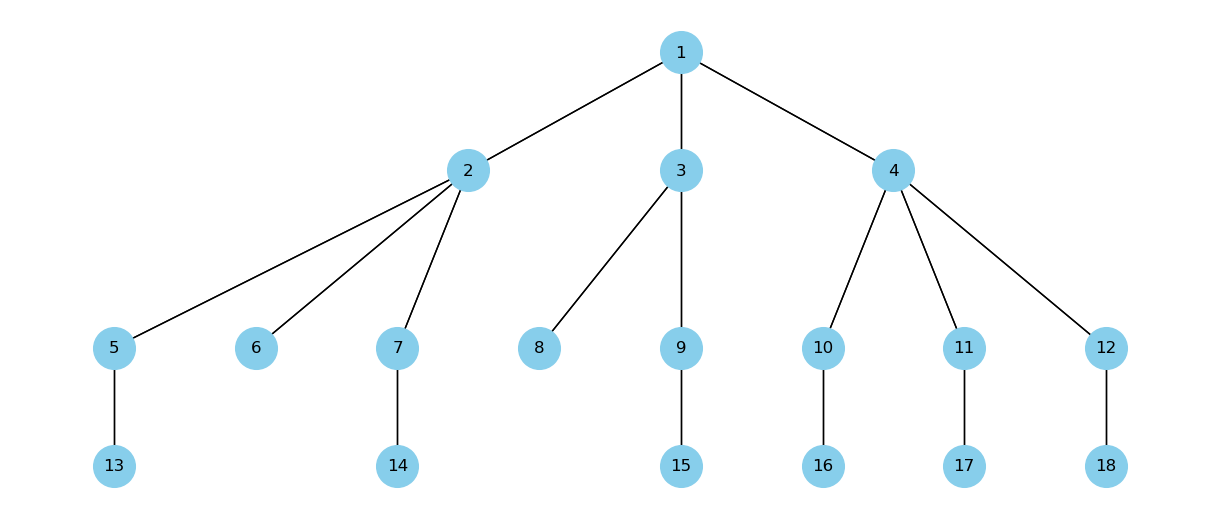

In [44]:
# Draw the graph according to the positions with labels
plt.figure(figsize=(12, 5))  # You can adjust these values as needed
nx.draw(G, positions, with_labels=True, node_color='skyblue', node_size=900)
nx.draw_networkx_edges(G, positions, edgelist=edges)
plt.show()

# Add your answer here

# Explain the steps

# Analyze the runtime $O(n)$

## Part 2 - Minimum Spanning Tree

The **Minimum Spanning Tree (MST)** is a concept in graph theory used to describe a subset of the edges in a weighted, undirected graph that connects all the vertices together without any cycles and with the minimum possible total edge weight. This concept is crucial in various applications such as network design, where the goal is to minimize the cost of laying out utilities. Two popular algorithms for finding the MST are Prim's Algorithm and Kruskal's Algorithm.

**Prim's Algorithm** starts from a single vertex and grows the spanning tree one edge at a time until all vertices are included. At each step, it selects the minimum weight edge that connects a vertex in the tree to a vertex outside the tree and adds it to the MST. This algorithm is somewhat similar in spirit to Breadth-First Search (BFS) as it explores outward from a starting vertex, considering all the neighboring edges and expanding to the closest unvisited vertices.

**Kruskal's Algorithm**, in contrast, begins by treating every vertex as a separate tree (or a set) and then merges these trees together by repeatedly adding the lowest weight edge that connects two different trees. It ignores edges that would form a cycle to ensure a tree structure is maintained. Kruskal's Algorithm can be thought of as having a Depth-First Search (DFS)-like flavor because it explores the graph based on edge weights, potentially jumping around the graph as it connects different components, rather than expanding out uniformly from a single point.

Both algorithms have their unique way of approaching the problem of finding the MST, with Prim's being more focused and localized in its search, similar to BFS, and Kruskal's being more global and encompassing, akin to DFS. However, the similarity to BFS and DFS is conceptual in terms of their expanding search patterns rather than direct applications of these searches.

In practice, Prim's Algorithm is efficient for dense graphs where the number of edges is large compared to the number of vertices, while Kruskal's Algorithm tends to perform better on sparse graphs. The choice between them depends on the specific characteristics of the graph in question and the computational resources available.

During the activity, you'll have the opportunity to apply both Prim's and Kruskal's Algorithms to construct the Minimum Spanning Tree of given graphs. This will not only solidify your understanding of these algorithms but also illustrate their differences in approach and how they each relate to fundamental search techniques like BFS and DFS.

Use the figure below to find the minimum spanning tree using both algorithms. You may implement in code or do it by hand and write your answer below the image. 

In [24]:
# Create an empty graph
G = nx.Graph()

# Add nodes with the node attribute 'pos' to position them
positions = {'a': (0, 0), 'b': (1, 2), 'h': (1, -2),
             'i': (2, 0), 'c': (3, 2), 'g': (3, -2),
             'd': (5, 2), 'f': (5, -2), 'e': (6, 0)}

# Stretch the graph horizontally by multiplying the x-coordinate by 2 (or any other factor)
scale_factor = 1.5  # Adjust this factor as needed
stretched_positions = {node: (x*scale_factor, y*scale_factor) for node, (x, y) in positions.items()}

# Add edges with weights
edges = [('a', 'b', 4), ('a', 'h', 8), ('b', 'h', 11),
         ('h', 'i', 7), ('i', 'c', 2), ('i', 'g', 6),
         ('h', 'g', 1), ('g', 'f', 2), ('c', 'f', 4),
         ('c', 'd', 7), ('d', 'f', 14), ('d', 'e', 9),
         ('f', 'e', 10), ('b', 'c', 8)]  # Each tuple represents (node1, node2, weight)

# Add nodes and edges to the graph
G.add_nodes_from(stretched_positions.keys())
G.add_weighted_edges_from(edges)


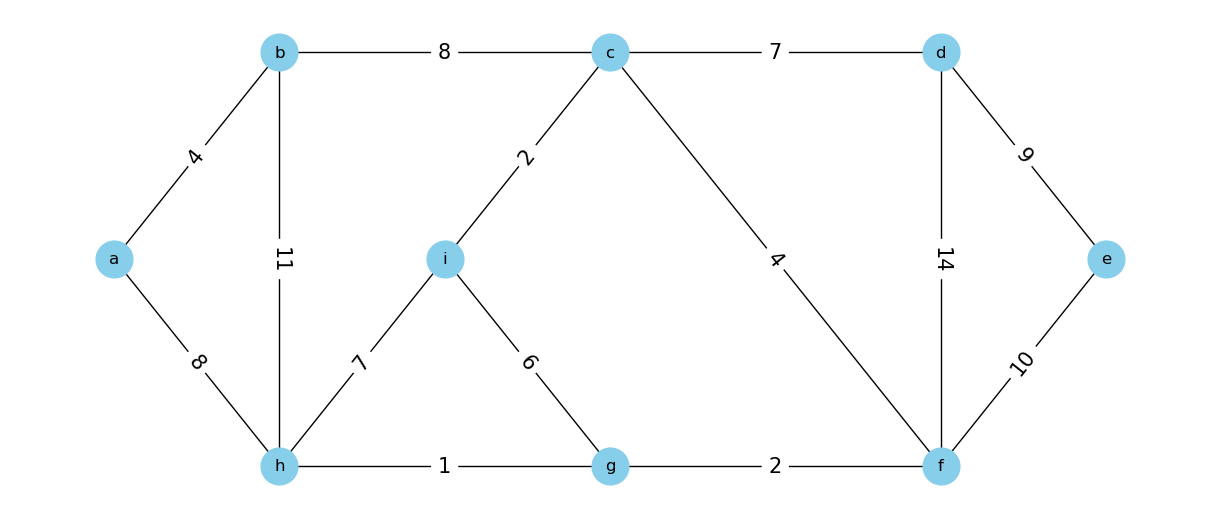

In [34]:
# Draw the graph according to the positions with labels and weights
plt.figure(figsize=(12, 5))  # You can adjust these values as needed
nx.draw(G, stretched_positions, with_labels=True, node_color='skyblue', node_size=700)

# Draw edge labels to show weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, stretched_positions, edge_labels=edge_labels, font_size=15)

plt.show()


# Add your answer here

# Explain the steps

# Analyze the runtime $O(n)$